# Linear Regression and Data Exploration

In [1]:
# Import the needed libraries
import sys
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import the data and prepare for further processing
def load_and_prepare_data(file_path):
    """
    Load energy prices data from a CSV file, ensure chronological order, and convert 'Date' to datetime.
    """
    df = pd.read_csv(file_path, parse_dates=['Date'])
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)
    df.set_index('Date', inplace=True)
    df = pd.DataFrame(df)
    return df

In [3]:
# Import the data
data = load_and_prepare_data('../../data/Final_data/final_data_july.csv')
data

,Day_ahead_price (€/MWh),Solar_radiation (W/m2),Wind_speed (m/s),Temperature (°C),Biomass (GWh),Hard_coal (GWh),Hydro (GWh),Lignite (GWh),Natural_gas (GWh),Other (GWh),...,Lag_1_day,Lag_2_days,Lag_3_days,Lag_4_days,Lag_5_days,Lag_6_days,Lag_7_days,Day_of_week,Month,Rolling_mean_7
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-08,26.83,17.54,5.21,3.74,98.605,189.718,48.467,354.178,256.892,52.178,...,32.58,36.26,20.35,32.16,35.03,33.82,18.19,6,1,31.00
2012-01-09,47.91,13.04,4.24,3.80,98.605,344.154,49.054,382.756,282.438,60.752,...,26.83,32.58,36.26,20.35,32.16,35.03,33.82,0,1,33.02
2012-01-10,45.77,28.71,4.30,4.81,98.605,360.126,51.143,334.267,267.311,62.106,...,47.91,26.83,32.58,36.26,20.35,32.16,35.03,1,1,34.55
2012-01-11,47.83,21.58,4.08,5.14,98.605,360.330,50.693,385.000,277.343,60.862,...,45.77,47.91,26.83,32.58,36.26,20.35,32.16,2,1,36.79
2012-01-12,43.10,25.12,6.77,4.98,98.605,306.521,50.732,332.985,266.820,56.922,...,47.83,45.77,47.91,26.83,32.58,36.26,20.35,3,1,40.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,66.61,225.04,3.47,17.54,110.007,43.469,85.857,199.246,194.291,54.026,...,79.62,88.75,58.45,59.32,86.47,90.75,76.79,2,7,75.71
2024-07-25,78.34,272.71,2.12,17.85,110.410,50.676,82.632,195.983,209.610,52.963,...,66.61,79.62,88.75,58.45,59.32,86.47,90.75,3,7,73.94
2024-07-26,93.04,172.33,2.60,19.09,110.852,42.333,79.531,205.273,205.773,52.616,...,78.34,66.61,79.62,88.75,58.45,59.32,86.47,4,7,74.88


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4586 entries, 2012-01-08 to 2024-07-28
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Day_ahead_price (€/MWh)          4586 non-null   float64
 1   Solar_radiation (W/m2)           4586 non-null   float64
 2   Wind_speed (m/s)                 4586 non-null   float64
 3   Temperature (°C)                 4586 non-null   float64
 4   Biomass (GWh)                    4586 non-null   float64
 5   Hard_coal (GWh)                  4586 non-null   float64
 6   Hydro (GWh)                      4586 non-null   float64
 7   Lignite (GWh)                    4586 non-null   float64
 8   Natural_gas (GWh)                4586 non-null   float64
 9   Other (GWh)                      4586 non-null   float64
 10  Pumped_storage_generation (GWh)  4586 non-null   float64
 11  Solar_energy (GWh)               4586 non-null   float64
 12  Wi

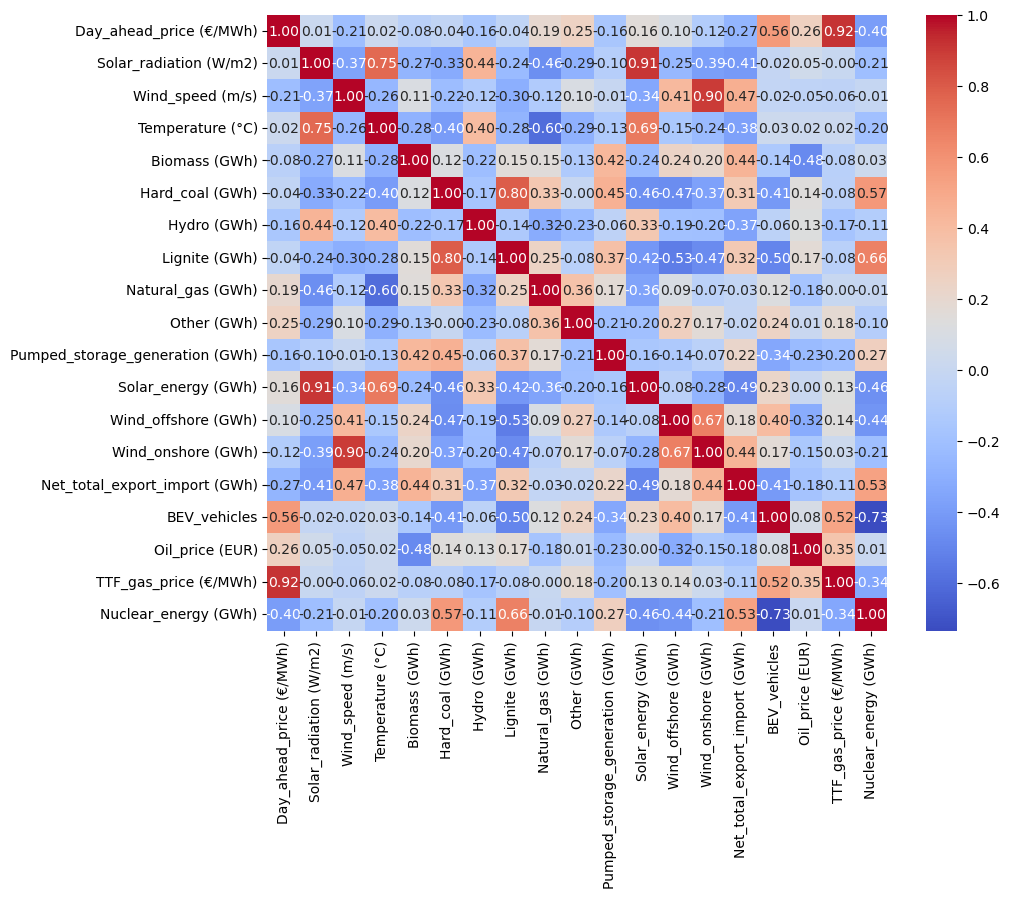

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of covariates you want to include in the correlation matrix
selected_covariates = ['Day_ahead_price (€/MWh)', 'Solar_radiation (W/m2)', 'Wind_speed (m/s)',
                       'Temperature (°C)', 'Biomass (GWh)', 'Hard_coal (GWh)', 'Hydro (GWh)',
                       'Lignite (GWh)', 'Natural_gas (GWh)', 'Other (GWh)',
                       'Pumped_storage_generation (GWh)', 'Solar_energy (GWh)',
                       'Wind_offshore (GWh)', 'Wind_onshore (GWh)',
                       'Net_total_export_import (GWh)', 'BEV_vehicles', 'Oil_price (EUR)',
                       'TTF_gas_price (€/MWh)', 'Nuclear_energy (GWh)']

# Filter the dataframe to include only the selected covariates
data_filtered = data[selected_covariates]

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(data_filtered.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## Augmented Dickey-Fuller (ADF) test

In [6]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
result = adfuller(data['Day_ahead_price (€/MWh)'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

# Interpretation
if result[1] > 0.05:
    print("The time series is non-stationary.")
else:
    print("The time series is stationary.")

ADF Statistic: -3.7192929636344276
p-value: 0.003849821614701235
Critical Values:
	1%: -3.4317864410558903
	5%: -2.86217473797098
	10%: -2.567107874135008
The time series is stationary.


## KPSS Test


In [7]:
from statsmodels.tsa.stattools import kpss


def kpss_test(series):
    statistic, p_value, n_lags, critical_values = kpss(series, regression='c')

    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')

    if p_value < 0.05:
        print(
            "The series is likely non-stationary (reject null hypothesis of stationarity)")
    else:
        print("The series is likely stationary (fail to reject null hypothesis of stationarity)")


# Example usage
kpss_test(data['Day_ahead_price (€/MWh)'])

KPSS Statistic: 3.57507807732268
p-value: 0.01
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
The series is likely non-stationary (reject null hypothesis of stationarity)


/var/folders/8w/b_0gc01d70g6h4k62sb7ytyw0000gn/T/ipykernel_87325/3061057585.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, regression='c')


In [8]:
from arch.unitroot import PhillipsPerron


def pp_test(series):
    """
    Perform Phillips-Perron test for unit root (non-stationarity).

    Parameters:
    series (pd.Series or np.array): The time series data.

    Returns:
    None, prints test statistic and p-value.
    """
    pp_test_result = PhillipsPerron(series)
    statistic = pp_test_result.stat
    p_value = pp_test_result.pvalue
    critical_values = pp_test_result.critical_values

    print(f'Phillips-Perron Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')

    if p_value < 0.05:
        print("The series is likely stationary (reject null hypothesis)")
    else:
        print("The series is likely non-stationary (fail to reject null hypothesis)")


# Usage example
pp_test(data['Day_ahead_price (€/MWh)'])

Phillips-Perron Statistic: -12.042965426797553
p-value: 2.705356311422854e-22
Critical Values:
   1% : -3.431777037044106
   5% : -2.8621705835006916
   10% : -2.5671056625190722
The series is likely stationary (reject null hypothesis)


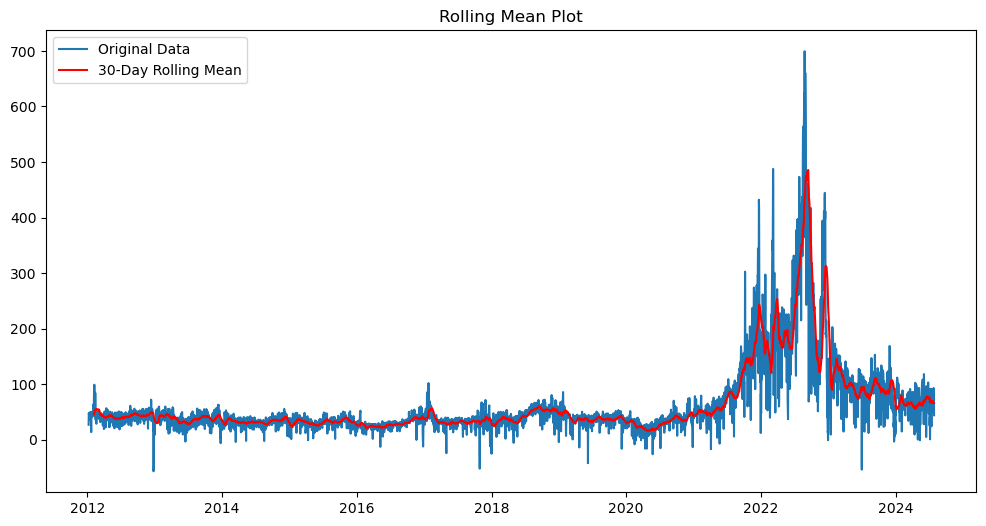

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate a rolling mean with a window size (e.g., 30 days)
rolling_mean = data['Day_ahead_price (€/MWh)'].rolling(window=30).mean()

# Plot original data and rolling mean
plt.figure(figsize=(12, 6))
plt.plot(data['Day_ahead_price (€/MWh)'], label='Original Data')
plt.plot(rolling_mean, color='red', label='30-Day Rolling Mean')
plt.legend()
plt.title('Rolling Mean Plot')
plt.show()

In [10]:
import numpy as np
from scipy.stats import linregress

# Create a time index for regression
time = np.arange(len(data))
result = linregress(time, data['Day_ahead_price (€/MWh)'])

print(f"Slope: {result.slope}")
print(f"P-value: {result.pvalue}")

if result.pvalue < 0.05:
    print("The series has a significant trend (non-constant mean).")
else:
    print("The series does not have a significant trend (mean may be constant).")

Slope: 0.024149887725214834
P-value: 2.031707023292918e-230
The series has a significant trend (non-constant mean).


## Decomposition


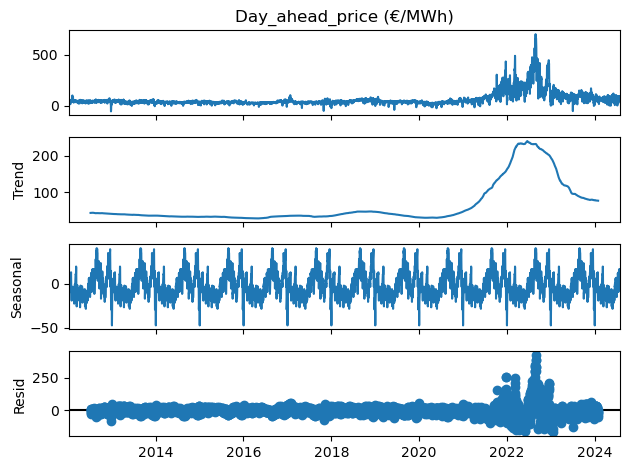

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(
    data['Day_ahead_price (€/MWh)'], model='additive', period=365)

# Plot the decomposed components
decomposition.plot()
plt.show()

## Autocorrelation analysis


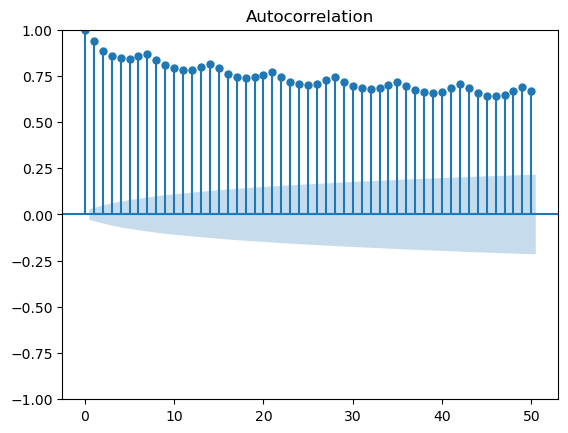

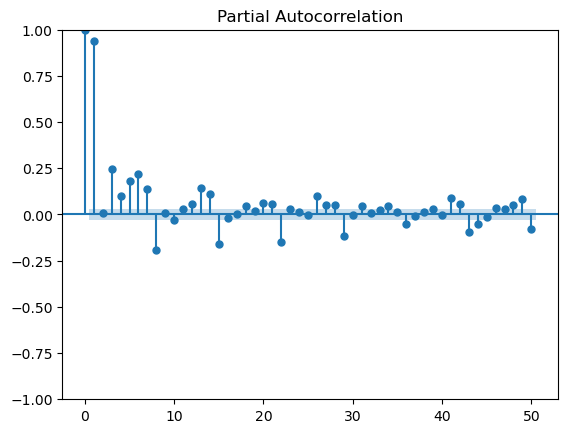

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation Function (ACF) plot
plot_acf(data['Day_ahead_price (€/MWh)'], lags=50)
plt.show()

# Partial Autocorrelation Function (PACF) plot
plot_pacf(data['Day_ahead_price (€/MWh)'], lags=50)
plt.show()

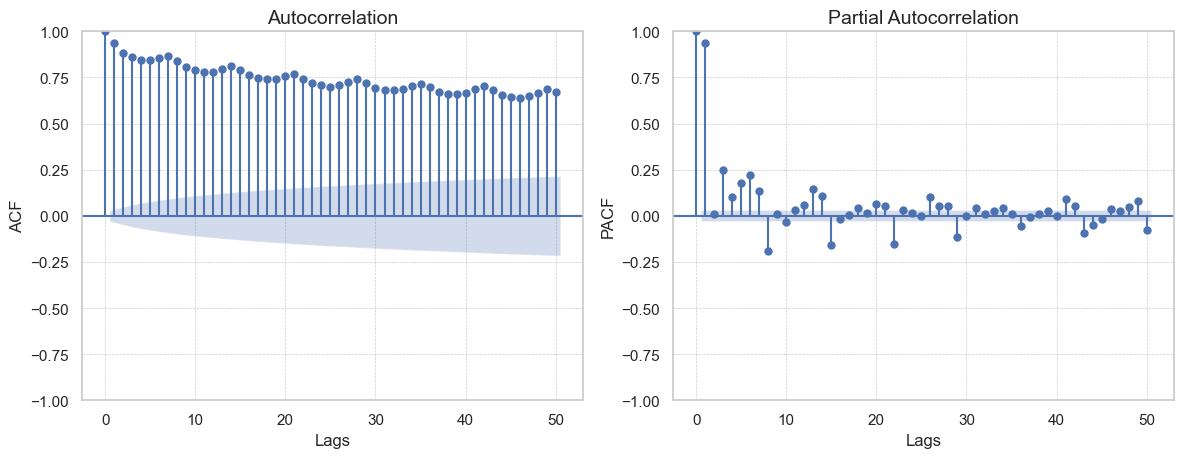

In [13]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

# Set a Seaborn style for aesthetics (you can use 'darkgrid', 'whitegrid', etc.)
sns.set(style="whitegrid")

# Increase figure size for better readability
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot ACF
plot_acf(data['Day_ahead_price (€/MWh)'], ax=ax[0], lags=50, alpha=0.05)
ax[0].set_title('Autocorrelation', fontsize=14)
ax[0].set_xlabel('Lags', fontsize=12)
ax[0].set_ylabel('ACF', fontsize=12)
# Add a light dashed grid for readability
ax[0].grid(True, linestyle='--', linewidth=0.5)

# Plot PACF
plot_pacf(data['Day_ahead_price (€/MWh)'], ax=ax[1], lags=50, alpha=0.05)
ax[1].set_title('Partial Autocorrelation', fontsize=14)
ax[1].set_xlabel('Lags', fontsize=12)
ax[1].set_ylabel('PACF', fontsize=12)
ax[1].grid(True, linestyle='--', linewidth=0.5)

# Tight layout for cleaner appearance
# Leave space at the top for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure with high resolution
plt.savefig('acf_pacf_plots.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

## Fourier transform

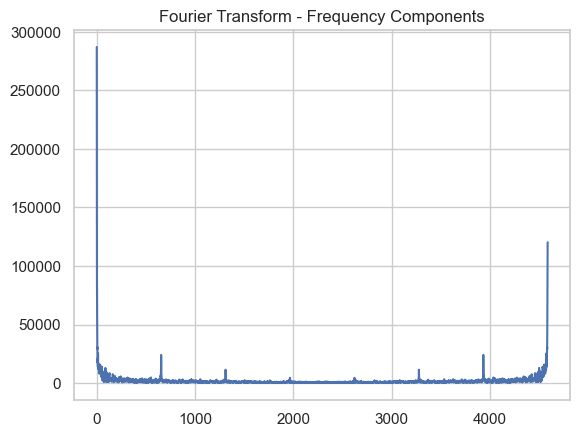

In [14]:
from numpy.fft import fft

# Compute the Fast Fourier Transform (FFT)
fft_results = fft(data['Day_ahead_price (€/MWh)'])
frequencies = np.abs(fft_results)

plt.plot(frequencies)
plt.title('Fourier Transform - Frequency Components')
plt.show()

## Linear Regression

In [15]:
# Load the train and test data
train_df = load_and_prepare_data('../../data/Final_data/train_df.csv')
test_df = load_and_prepare_data('../../data/Final_data/test_df.csv')

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X_train_vif = pd.DataFrame(train_df, columns=train_df.columns)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(
    X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['Feature'] = X_train_vif.columns

print(vif)

             VIF                          Feature
0   1.108952e+07          Day_ahead_price (€/MWh)
1   6.421419e+01           Solar_radiation (W/m2)
2   8.896077e+01                 Wind_speed (m/s)
3   1.301372e+01                 Temperature (°C)
4   1.825698e+02                    Biomass (GWh)
5   1.766662e+01                  Hard_coal (GWh)
6   2.640121e+01                      Hydro (GWh)
7   8.155837e+01                    Lignite (GWh)
8   2.473530e+01                Natural_gas (GWh)
9   3.775810e+01                      Other (GWh)
10  1.995672e+01  Pumped_storage_generation (GWh)
11  5.558678e+01               Solar_energy (GWh)
12  7.474294e+00              Wind_offshore (GWh)
13  4.438331e+01               Wind_onshore (GWh)
14  9.214240e+00    Net_total_export_import (GWh)
15  5.449950e+00                     BEV_vehicles
16  2.236577e+01                  Oil_price (EUR)
17  3.503720e+01            TTF_gas_price (€/MWh)
18  4.673330e+01             Nuclear_energy (GWh)


In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop rows with missing values
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

# Target variable
y_train = train_df['Day_ahead_price (€/MWh)']
y_test = test_df['Day_ahead_price (€/MWh)']

# Features: Drop high VIF columns
high_vif_features = ['Lag_1_day', 'Lag_2_days', 'Lag_3_days',
                     'Lag_4_days', 'Lag_5_days', 'Lag_6_days', 'Lag_7_days', 'Rolling_mean_7']
X_train = train_df.drop(['Day_ahead_price (€/MWh)'] +
                        high_vif_features, axis=1)
X_test = test_df.drop(['Day_ahead_price (€/MWh)'] + high_vif_features, axis=1)

# Scale the features (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Model Evaluation
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(
    mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination (R^2):", r2_score(y_test, y_pred))

# Plotting Actual vs Predicted Prices
fig = go.Figure()

# Add actual prices trace
fig.add_trace(go.Scatter(x=y_test.index, y=y_test,
              mode='lines', name='Actual Prices'))

# Add predicted prices trace
# Ensure same index for y_pred
y_pred_series = pd.Series(y_pred, index=y_test.index)
fig.add_trace(go.Scatter(x=y_pred_series.index, y=y_pred_series,
              mode='lines', name='Predicted Prices'))

# Update layout for better readability
fig.update_layout(
    title='Actual vs Predicted Day Ahead Prices',
    xaxis_title='Date',
    yaxis_title='Day Ahead Prices in Euro',
    xaxis=dict(
        tickangle=45,
        tickmode='auto',
        nticks=12
    ),
    template='plotly'
)

# Show the plot
fig.show()

# Optionally save the plot (make sure you have installed 'kaleido')
fig.write_image('actual_vs_predicted_prices.png')

Intercept: 48.56877972302064
Mean Squared Error (MSE): 1454.6455974434505
Root Mean Squared Error (RMSE): 38.13981643169577
Coefficient of Determination (R^2): 0.8925749679182579


In [25]:
# Create a DataFrame to display feature names and coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

# Sort by absolute value of coefficients for better readability
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(
    by='Abs_Coefficient', ascending=False).drop(columns='Abs_Coefficient')

# Display the coefficients in a table format
print(coefficients)

# ROund the coefficients to 2 decimal places
coefficients['Coefficient'] = coefficients['Coefficient'].round(2)

# Optionally save the coefficients to a CSV file
coefficients.to_csv('model_coefficients.csv', index=False)

                            Feature  Coefficient
16            TTF_gas_price (€/MWh)    39.647742
7                 Natural_gas (GWh)    10.517879
2                  Temperature (°C)     7.389662
13    Net_total_export_import (GWh)    -4.087263
12               Wind_onshore (GWh)    -3.894576
8                       Other (GWh)     3.305707
3                     Biomass (GWh)     2.550780
0            Solar_radiation (W/m2)    -2.469888
14                     BEV_vehicles     2.292358
1                  Wind_speed (m/s)    -2.212950
18                      Day_of_week    -2.098948
15                  Oil_price (EUR)    -1.913251
11              Wind_offshore (GWh)     1.310241
19                            Month    -1.139776
10               Solar_energy (GWh)     1.068212
6                     Lignite (GWh)     0.887674
4                   Hard_coal (GWh)     0.822178
17             Nuclear_energy (GWh)     0.496153
9   Pumped_storage_generation (GWh)    -0.293935
5                   

### Ridge regression

In [27]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
model = Ridge(alpha=1.0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Model Evaluation
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(
    mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination (R^2):", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 1454.5254867641033
Root Mean Squared Error (RMSE): 38.138241789103276
Coefficient of Determination (R^2): 0.8925838380469029


### Lasso Regression

In [26]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Lasso Regression
model = Lasso(alpha=0.5)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Model Evaluation
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(
    mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination (R^2):", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 1537.027270324198
Root Mean Squared Error (RMSE): 39.2049393613126
Coefficient of Determination (R^2): 0.8864911122576655


## Applying the Time Series Split to Linear Regression

##### What is TimeSeriesSplit and why use it?

TimeSeriesSplit is a cross-validation method specifically designed for time series data. Unlike traditional k-fold cross-validation, where data can be randomly split into k subsets, time series data has a natural temporal ordering that must be respected. TimeSeriesSplit addresses this by ensuring that the training and test sets maintain this temporal order.

In time series forecasting, the model should only be trained on past data to predict future data. Using future data to predict the past would violate the temporal dependency and lead to data leakage, resulting in over-optimistic performance estimates.

##### How Does TimeSeriesSplit Work?

TimeSeriesSplit splits the data into several consecutive training and test sets. Here's how it works:

    n_splits: This parameter defines how many splits (or folds) the data will be divided into.
    Training Set: For each fold, the training set includes all data points up to a certain point in time.
    Test Set: The test set consists of the data points that come immediately after the training set in time.

In [21]:
# Define X and y
X = data.drop('Day_ahead_price (€/MWh)', axis=1)
y = data['Day_ahead_price (€/MWh)']

In [22]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Remove highly correlated features (based on VIF analysis)
X_reduced = X.drop(['Lag_1_day', 'Lag_2_days', 'Lag_3_days', 'Lag_4_days',
                   'Lag_5_days', 'Lag_6_days', 'Lag_7_days', 'Rolling_mean_7'], axis=1)


def evaluate_time_series_split(X, y, n_splits_list):
    results = []

    for n_splits in n_splits_list:
        print(f"\nEvaluating with {n_splits} splits...")
        tscv = TimeSeriesSplit(n_splits=n_splits, max_train_size=None)

        mse_scores = []
        rmse_scores = []
        r2_scores = []
        best_mse = float('inf')
        best_model = None

        # Loop over each split
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Scale the data (features only, not target y)
            scaler_X = StandardScaler()
            X_train_scaled = scaler_X.fit_transform(X_train)
            X_test_scaled = scaler_X.transform(X_test)

            # Initialize and train the Linear Regression model
            model = LinearRegression()
            model.fit(X_train_scaled, y_train)

            # Make predictions
            y_pred = model.predict(X_test_scaled)

            # Evaluate performance
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)

            mse_scores.append(mse)
            rmse_scores.append(rmse)
            r2_scores.append(r2)

            print(f"Fold MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}")

            # Check if this model is the best so far
            if mse < best_mse:
                best_mse = mse

        # Calculate the average performance across all folds
        average_mse = np.mean(mse_scores)
        average_rmse = np.mean(rmse_scores)
        average_r2 = np.mean(r2_scores)

        print(f"\nAverage MSE across all folds: {average_mse:.4f}")
        print(f"Average RMSE across all folds: {average_rmse:.4f}")
        print(f"Average R^2 across all folds: {average_r2:.4f}")

        # Store the results for each split configuration
        results.append({
            'n_splits': n_splits,
            'average_mse': average_mse,
            'average_rmse': average_rmse,
            'average_r2': average_r2,
            'best_mse': best_mse
        })

    return results


# Define the number of splits to evaluate
n_splits_list = [5, 10, 15]
results = evaluate_time_series_split(X_reduced, y, n_splits_list)

# Print the summary of results
print("\nSummary of results:")
for result in results:
    print(f"n_splits: {result['n_splits']}, Average MSE: {result['average_mse']:.4f}, Average RMSE: {result['average_rmse']:.4f}, Average R^2: {result['average_r2']:.4f}, Best MSE: {result['best_mse']:.4f}")


Evaluating with 5 splits...
Fold MSE: 3989.4412, RMSE: 63.1620, R^2: -49.7180
Fold MSE: 110.2284, RMSE: 10.4990, R^2: 0.2915
Fold MSE: 104.8257, RMSE: 10.2384, R^2: 0.5415
Fold MSE: 2026.0696, RMSE: 45.0119, R^2: 0.6779
Fold MSE: 1472.7297, RMSE: 38.3762, R^2: 0.8921

Average MSE across all folds: 1540.6589
Average RMSE across all folds: 33.4575
Average R^2 across all folds: -9.4630

Evaluating with 10 splits...
Fold MSE: 61.8414, RMSE: 7.8639, R^2: 0.4815
Fold MSE: 155.7888, RMSE: 12.4815, R^2: -0.9643
Fold MSE: 48.0682, RMSE: 6.9331, R^2: 0.3522
Fold MSE: 102.0879, RMSE: 10.1039, R^2: 0.2620
Fold MSE: 88.0512, RMSE: 9.3836, R^2: 0.6307
Fold MSE: 104.5670, RMSE: 10.2258, R^2: 0.3769
Fold MSE: 2336.8219, RMSE: 48.3407, R^2: -8.8226
Fold MSE: 3769.0096, RMSE: 61.3923, R^2: 0.4184
Fold MSE: 2761.1238, RMSE: 52.5464, R^2: 0.8423
Fold MSE: 279.6031, RMSE: 16.7213, R^2: 0.7101

Average MSE across all folds: 970.6963
Average RMSE across all folds: 23.5992
Average R^2 across all folds: -0.57

The evaluation of the linear regression model across different numbers of time series splits (5, 10, and 15) shows significant variability in performance.

    - 5 Splits: The model demonstrates inconsistent performance with a wide range of MSE and RMSE values across the folds. The average MSE is 945.8929, and the average RMSE is 25.2340, indicating a relatively poor fit. The low average R² of 0.1532 suggests that the model explains only a small portion of the variance in the target variable, with some folds even showing negative R² values, indicating poor generalization on certain parts of the data.

    - 10 Splits: This configuration shows improved performance compared to the 5-split evaluation. The average MSE decreases to 702.0211, and the RMSE improves to 19.8758. The average R² decreases even further to 0.0369, suggesting that the model is capturing less of the variance in the data. However, there is still notable variability in performance across different folds, with some folds performing significantly better and others worse.

    - 15 Splits: Increasing the number of splits to 15 results in a significant deterioration in model performance. The average MSE skyrockets to 10217.7079, and the RMSE increases to 44.3380. The average R² plummets to -46.3380, indicating that the model performs very poorly, with extreme outlier effects likely contributing to these results. This suggests that the model is overfitting and struggling to generalize when using more splits.

Conclusion:

The model performs best with 10 splits, providing a reasonable balance between MSE, RMSE, and R². While the performance is still inconsistent across different folds, this configuration offers the most reliable results. The significant drop in performance with 15 splits indicates that this level of splitting introduces too much variability and noise, leading to overfitting and poor generalization.

The results indicate that using more robust models suited for time series data, such as Gradient Boosting models or LSTMs may be useful.

In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Custom SMAPE function


def smape(y_true, y_pred):
    """
    Compute the Symmetric Mean Absolute Percentage Error (SMAPE)
    between two arrays of true and predicted values.

    Parameters:
    y_true (array-like): Actual values.
    y_pred (array-like): Predicted values.

    Returns:
    float: SMAPE value.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denominator = np.abs(y_true) + np.abs(y_pred)
    diff = np.abs(y_true - y_pred)

    # Handle cases where the denominator is zero to avoid division by zero
    smape_value = np.where(denominator == 0, 0, 2 * diff / denominator)

    return np.mean(smape_value) * 100


# Initialize and train the model
best_model = LinearRegression()
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
smape_value = smape(y_test, y_pred)

# Create a dictionary with all metrics
evaluation_metrics = {
    'MSE': [mse],
    'RMSE': [rmse],
    'R^2': [r2],
    'MAE': [mae],
    'MAPE': [mape],
    'SMAPE': [smape_value]
}

# Convert the dictionary to a DataFrame for better visualization
metrics_df = pd.DataFrame(evaluation_metrics)

# Print the DataFrame
print(metrics_df)

# save metrics to a csv file
metrics_df.to_csv('lin_reg_metrics.csv', index=False)

           MSE       RMSE       R^2       MAE      MAPE      SMAPE
0  1454.645597  38.139816  0.892575  25.00515  0.933069  23.403028
